<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Salary prediction**


In [197]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
data=pd.read_csv('/content/salary_predict_dataset.csv')

In [199]:
data.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [201]:
data.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


In [202]:
#let us check the no of nan values
data.isnull().sum()

experience         5
test_score         1
interview_score    1
Salary             0
dtype: int64

Since there are only few nan values we just replace them with 0.

In [203]:
data['test_score']=data['test_score'].fillna(0)
data['interview_score']=data['interview_score'].fillna(0)

In [204]:
data.head()


,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [205]:
data['experience'].value_counts()

six         2
five        2
three       2
one         2
ten         2
twelve      1
thirteen    1
four        1
eleven      1
fifteen     1
Name: experience, dtype: int64

In [206]:
ordinal_values={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fifteen':15}     


In [207]:
data['experience']=data['experience'].map(ordinal_values)

In [208]:
data.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,3.0,6.0,5.0,30000
3,5.0,9.0,9.0,55000
4,6.0,3.0,5.0,13000


In [209]:
data['experience']=data['experience'].fillna(0)

In [210]:
data.head()

,experience,test_score,interview_score,Salary
0,0.0,8.0,8.0,50000
1,0.0,5.0,4.0,22000
2,3.0,6.0,5.0,30000
3,5.0,9.0,9.0,55000
4,6.0,3.0,5.0,13000


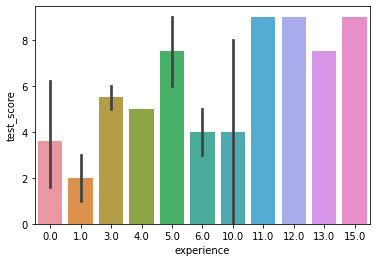

In [236]:
sns.barplot(x=data['experience'],y=data['test_score'])

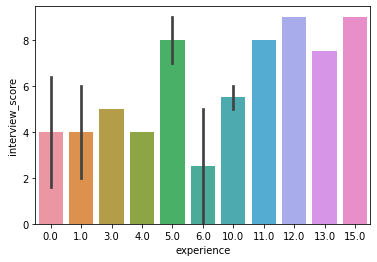

In [239]:
sns.barplot(x=data['experience'],y=data['interview_score'])

From this graph we can see that the most experienced persons have performed well in both the tests.

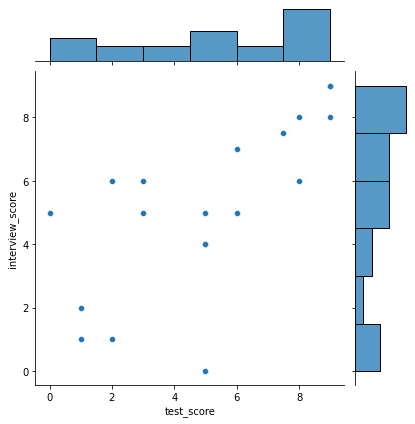

In [237]:
sns.jointplot(x=data['test_score'],y=data['interview_score'])

In this we could infer that the persons who have scored well in test_score have also scored better in interview_score.

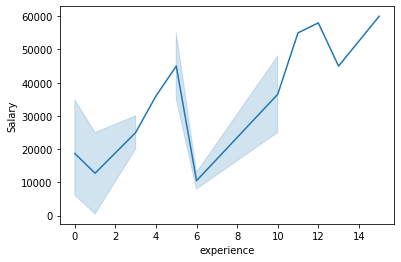

In [238]:
sns.lineplot(x=data['experience'],y=data['Salary'])

From this we can see as experience increases...Salary also increases...

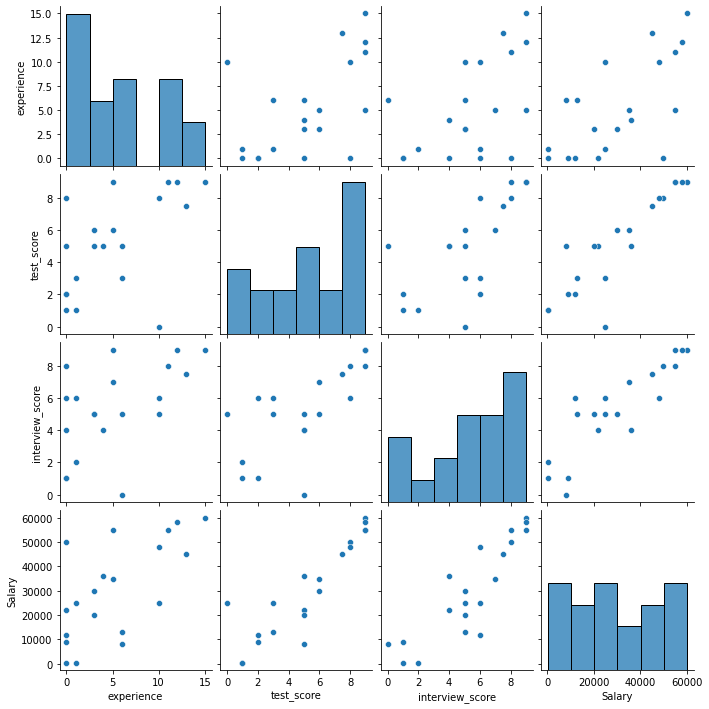

In [240]:
sns.pairplot(data)

In [211]:
X=data.drop(columns=['Salary'],axis=1)
y=data['Salary']

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=102)

**Linear Regression**


In [214]:
from sklearn.linear_model  import LinearRegression

In [215]:
lr=LinearRegression()

In [216]:
model=lr.fit(X_train,y_train)

In [217]:
pred=model.predict(X_test)

In [218]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [219]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squarred error: ',mean_squared_error(y_test,pred))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score: ',r2_score(y_test,pred))

Mean absolute error:  4211.645949907349
Mean squarred error:  32755469.092638977
 Root mean squarred error:  5723.239388024843
R2 Score:  0.26392204286204546


**SVM**


In [225]:
from sklearn.svm import LinearSVR

In [226]:
svr=LinearSVR(epsilon=1.5)

In [228]:
model_2=svr.fit(X_train,y_train)

In [233]:
pred_2=model_2.predict(X_test)

In [234]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_2))
print('Mean squarred error: ',mean_squared_error(y_test,pred_2))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred_2)))

Mean absolute error:  16298.875
Mean squarred error:  307388835.1875
 Root mean squarred error:  17532.507954867724


**SGD**


In [220]:
from sklearn.linear_model import SGDRegressor

In [221]:
sgd_regressor=SGDRegressor(max_iter=1000,eta0=0.1)

In [222]:
model_1=sgd_regressor.fit(X_train,y_train)

In [229]:
pred_1=model_1.predict(X_test)

In [231]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_1))
print('Mean squarred error: ',mean_squared_error(y_test,pred_1))
print(' Root mean squarred error: ',np.sqrt(mean_squared_error(y_test,pred_1)))


Mean absolute error:  925093155161.6538
Mean squarred error:  9.356347714589552e+23
 Root mean squarred error:  967282157107.7155
